## Person not a Person classification using CNN

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
import os
from skimage import io,filters
from skimage.feature import hog
from skimage import data, exposure

KeyboardInterrupt: 

In [ ]:
for count, filename in enumerate(os.listdir("PersonCNNClassifier/validation/person")): 
        dst ="Person" + str(count) + ".jpg"
        src ='PersonCNNClassifier/validation/person/'+ filename 
        dst ='PersonCNNClassifier/validation/person/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)
for count, filename in enumerate(os.listdir("PersonCNNClassifier/validation/notperson")): 
        dst ="NotPerson" + str(count) + ".jpg"
        src ='PersonCNNClassifier/validation/notperson/'+ filename 
        dst ='PersonCNNClassifier/validation/notperson/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)

In [ ]:
for count, filename in enumerate(os.listdir("PersonCNNClassifier/test/person")): 
        dst ="P" + str(count) + ".jpg"
        src ='PersonCNNClassifier/test/person/'+ filename 
        dst ='PersonCNNClassifier/test/person/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)
for count, filename in enumerate(os.listdir("PersonCNNClassifier/test/notperson")): 
        dst ="NotPerson" + str(count) + ".jpg"
        src ='PersonCNNClassifier/test/notperson/'+ filename 
        dst ='PersonCNNClassifier/test/notperson/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)

In [ ]:
for count, filename in enumerate(os.listdir("PersonCNNClassifier/train/person")): 
        dst ="P" + str(count) + ".jpg"
        src ='PersonCNNClassifier/train/person/'+ filename 
        dst ='PersonCNNClassifier/train/person/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)
for count, filename in enumerate(os.listdir("PersonCNNClassifier/train/notperson")): 
        dst ="NotPerson" + str(count) + ".jpg"
        src ='PersonCNNClassifier/train/notperson/'+ filename 
        dst ='PersonCNNClassifier/train/notperson/'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)

In [60]:
def myFunc(image):
    #try:
        #image = np.array(image)
        #converted_img = rgb_to_cmyk(image)
        #converted_img /= 255

        #image=filters.gaussian(image,sigma=2)
        #fd, image = hog(image, orientations=9, pixels_per_cell=(10, 10),
                    #cells_per_block=(3, 3), visualize=True)
        #image = exposure.rescale_intensity(image, in_range=(0, 10))
        #image = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5) 
        #image = cv2.Canny(image,400,200)
    #except:
        #print("something went wrong")
    return image

In [61]:
train=ImageDataGenerator(rescale=1/255,preprocessing_function=myFunc)
validation=ImageDataGenerator(rescale=1/255,preprocessing_function=myFunc)

In [62]:
train_dataset=train.flow_from_directory('PersonCNNClassifier/train/',target_size=(200,200), batch_size=3,class_mode='binary')

validation_dataset=train.flow_from_directory('PersonCNNClassifier/validation/',target_size=(200,200), batch_size=3,class_mode='binary')

Found 200 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [63]:
train_dataset.class_indices

{'notperson': 0, 'person': 1}

In [64]:
print(train_dataset.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [65]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512,activation='relu'),
                                    
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                   
                                  ])

In [66]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy']
             )

In [67]:
model_fit= model.fit(train_dataset,
                    steps_per_epoch=5,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
5/5 [==============================] - 87s 17s/step - loss: 22.1219 - accuracy: 0.4000 - val_loss: 1.3858 - val_accuracy: 0.5645
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 2.9158 - accuracy: 0.6000 - val_loss: 0.4009 - val_accuracy: 0.8548
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 1.4856 - accuracy: 0.6000 - val_loss: 0.7075 - val_accuracy: 0.5968
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.5444 - accuracy: 0.8000 - val_loss: 1.2742 - val_accuracy: 0.5323
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 1.2950 - accuracy: 0.6667 - val_loss: 1.7915 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.5109 - accuracy: 0.8667 - val_loss: 0.3872 - val_accuracy: 0.9032
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.7544 - accuracy: 0.6667 - val_loss: 0.4167 - val_accuracy: 0.7903
Epoch 8/20
5/5 [======================

person


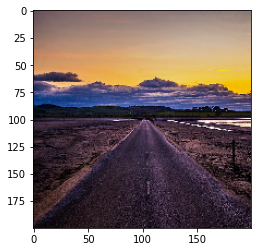

not a person


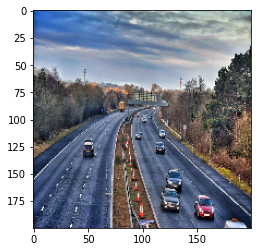

not a person


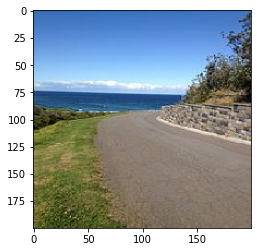

not a person


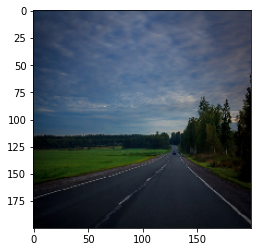

not a person


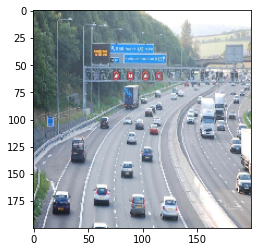

person


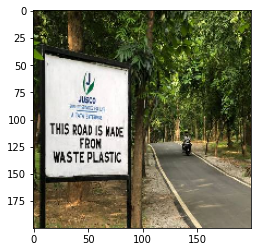

not a person


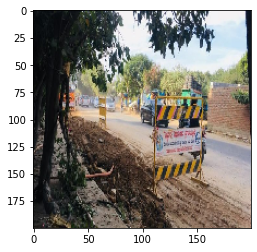

person


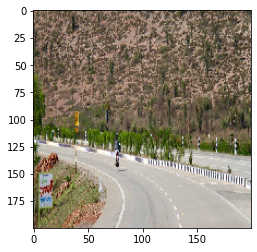

not a person


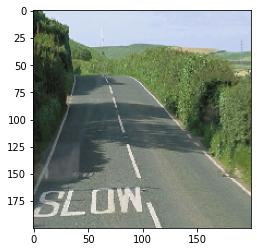

person


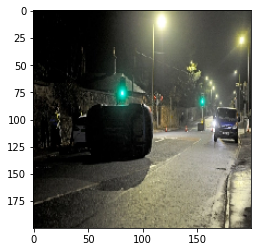

person


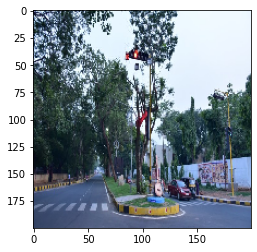

person


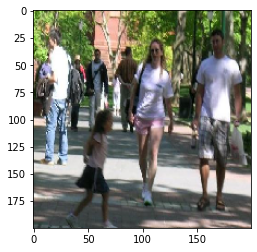

person


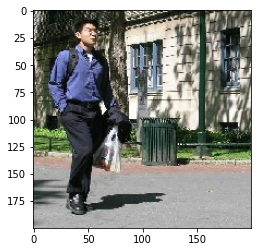

person


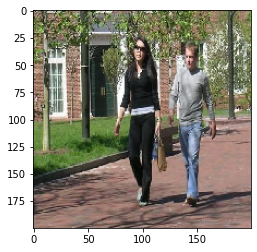

person


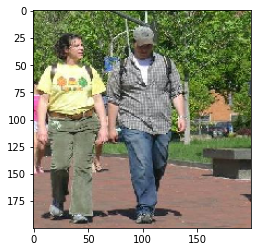

person


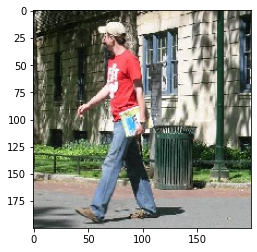

person


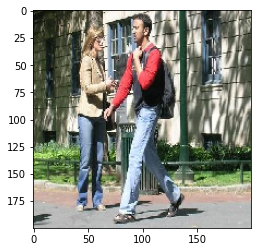

person


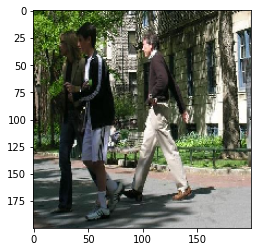

person


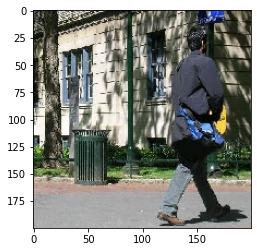

person


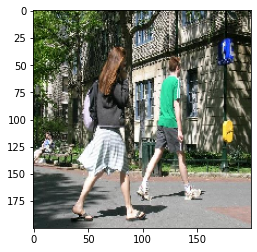

person


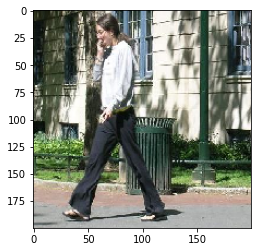

person


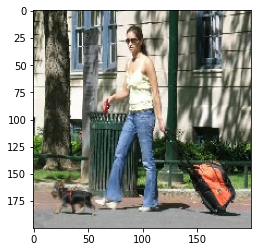

In [57]:
from PIL import Image
dir_path='PersonCNNClassifier/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("not a person")
    else:
        print("person")
    plt.imshow(img)
    plt.show()

In [3]:
import cv2
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())